In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# Q1
  1. $Tr=3$ and $det=-13$. Unstable saddle
  2. $Tr=2$ and $det=4$. The descriminant is $4 - 4(4) = -12$. Unstable spiral.
  3. $Tr=5$ and $det=5$. The descriminant is $25 - 20 = 5$. Unstable node.
  4. $Tr=0$ and $det=-3$. Stable center.
-------------

# Q2
----------------------
## Q2.a
For algae:
  * The birth rate is $\alpha n$
  * the natural death rate is $\beta n$
  * the death rate due to toxin is $Kyn$

For the toxin:
  * the production (birth) rate is $\gamma n$
  * the death rate is $\delta y$
  
## Q2.b
The $n$-nullclines are the curves
$$ n = 0, \quad y = \frac{\alpha - \beta}{K}.$$
The $y$-nullclines is the curve
$$ y = \frac{\gamma}{\delta} n.$$
There are two fixed points: at $(0, 0)$ and 
$(\frac{\delta(\alpha - \beta)}{\gamma K}, \frac{\alpha - \beta}{K})$. 
See graphs in the cell below for the phase portrait.

## Q2.c
See graphs in the cell below.

## Q2.d

The Jacobian matrix is
$$
J(n, y) = 
\begin{bmatrix}
  \alpha - \beta - K y & -Kn\\
  \gamma & - \delta
\end{bmatrix}.
$$

The Jacobian matrix at the trivial equilibrium $(0, 0)$ is 
$$
J(0, 0) = 
\begin{bmatrix}
  \alpha - \beta & 0\\
  \gamma & - \delta
\end{bmatrix}.
$$
The $Tr = \alpha - \beta - \delta$ and $det=-\delta(\alpha - \beta)$. If $\alpha < \beta$, the determinant is positive and the trace negative, which means the trivial fixed point is stable. If $\alpha > \beta$, the determininant is negative and the trivial fixed point is unstable.

The Jacobian matrix at the coexistence equilibrium $(\frac{\delta(\alpha - \beta)}{\gamma K}, \frac{\alpha - \beta}{K})$ is 
$$
J(\frac{\delta(\alpha - \beta)}{\gamma K}, \frac{\alpha - \beta}{K}) = 
\begin{bmatrix}
  0 & -\frac{\delta(\alpha - \beta)}{\gamma}\\
  \gamma & - \delta
\end{bmatrix}.
$$
The $Tr=-\delta$ and the $det=\delta(\alpha - \beta)$. The trace is always negative since $\delta>0$.
If $\alpha < \beta$, the determinant is negative, which means the coexistence equilibrium is unstable. 
If $\alpha > \beta$, the determininant is positive, which means the coexistence equilibrium is stable.
The descriminant is $$Disc = \delta^2 - 4\delta(\alpha - \beta) = \delta - 4(\alpha - \beta).$$
When $\delta < 4(\alpha + \beta)$, the coexistence equilibrium is a spiral, and it is a node when $\delta > 4(\alpha + \beta)$.


## Q2.e
Trajectories are shown in the phase portrait below. The coexistence equilibrium is a spiral when $\delta < 4(\alpha + \beta)$. In terms of the biology, this means that the toxin takes longer to break down than the net birth rate $\alpha - \beta$ of the algae. This creates a delayed feedback that results in oscillatory behavior with a decaying aplitude.

## Q2.f
When the toxin breakes down or is diluted very fast compared to the net birth rate of the algae, the coexistence equilibrium will be a stable node.


# $\alpha > \beta$

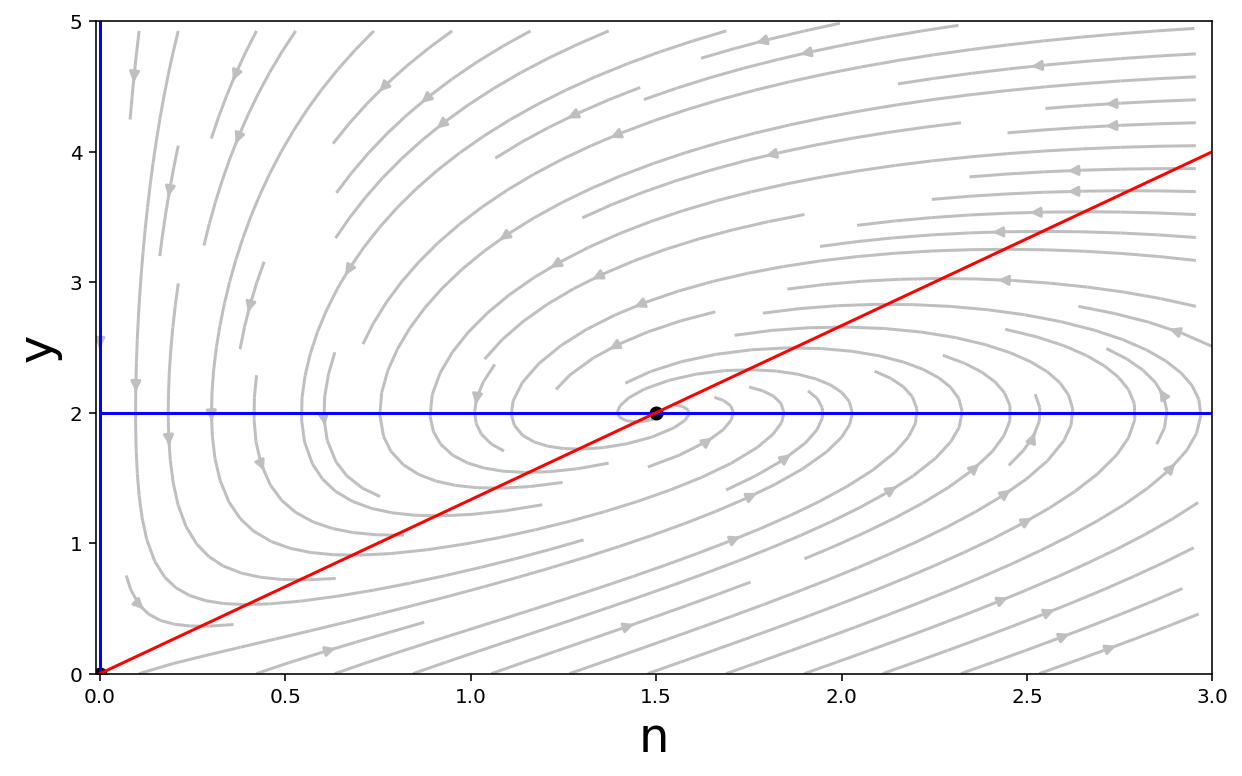

In [139]:
alpha = 3
beta = 1
K = 1
gamma = 2
delta = 1.5


figure(1, [10, 6])


## fixed points
nhat = delta/gamma*(alpha - beta)/K
yhat = (alpha - beta)/K
plot(0, 0, 'ok')
plot(nhat, yhat, 'ok')

###### for vector field and phase plane
## n-nullcline
n = linspace(0, 5, 200)
y = yhat*ones(200)
plot(0*n, n, 'b')
plot(x, y, 'b')
## y-nullcline
n = linspace(0, 5, 200)
y = gamma/delta*n
plot(n, y, 'r')

## vector field
N, Y = meshgrid(linspace(0, 3, 50), linspace(0, 5, 50))
U = (alpha - beta - K*Y)*N
V = gamma*N - delta*Y
streamplot(N, Y, U, V, color='0.75')


xlim(-0.01, 3)
ylim(0, 5)
xlabel('n', fontsize=24)
ylabel('y', fontsize=24);

# $\alpha < \beta$

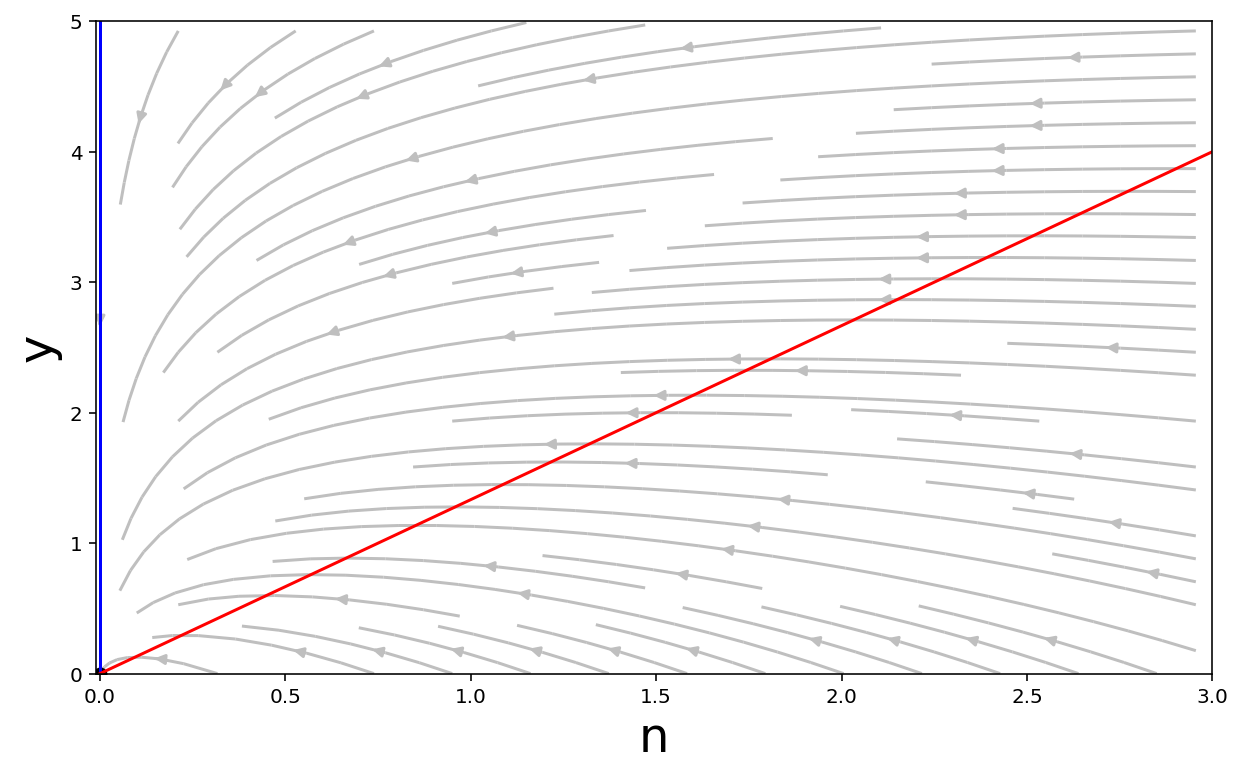

In [140]:
alpha = 1
beta = 3
K = 1
gamma = 2
delta = 1.5


figure(1, [10, 6])


## fixed points
nhat = delta/gamma*(alpha - beta)/K
yhat = (alpha - beta)/K
plot(0, 0, 'ok')
plot(nhat, yhat, 'ok')

###### for vector field and phase plane
## n-nullcline
n = linspace(0, 5, 200)
y = yhat*ones(200)
plot(0*n, n, 'b')
plot(x, y, 'b')
## y-nullcline
n = linspace(0, 5, 200)
y = gamma/delta*n
plot(n, y, 'r')

## vector field
N, Y = meshgrid(linspace(0, 3, 50), linspace(0, 5, 50))
U = (alpha - beta - K*Y)*N
V = gamma*N - delta*Y
streamplot(N, Y, U, V, color='0.75')


xlim(-0.01, 3)
ylim(0, 5)
xlabel('n', fontsize=24)
ylabel('y', fontsize=24);

# Q3
$$
\begin{align}
\dot{x} &= a x - bxy - k_1 x \\
\dot{y} &= bxy - dy - k_2 y,
\end{align}
$$
where $k_1>0$ is the death rate for the effect of pesticide on the prey and $k_2>0$ is the corresponding death rate for the predator.

--------------------

# Q4

In [90]:
def stochastic_pp(epsilon):
    N = zeros(Nsteps)
    N[0] = n0
    M = zeros(Nsteps)
    M[0] = m0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        n = N[j-1]
        m = M[j-1]
        #### There are 4 'arrows' leaving a given state: N-birth, N-death, M-birth, M-death
        combined_rate = a*n + epsilon*b*n*m + k1*n + epsilon*c*n*m + d*m + k2*m
        u = rand(1)
        tau = -log(u)/combined_rate
        T[j] = T[j-1] + tau # update time array with new time value
        ## now we make a random variable to decide if birth or death occurs
        ## the order in the vector is N-birth, N-death, M-birth, M-death
        probability_vector = array([a*n, epsilon*b*n*m + k1*n, epsilon*c*n*m, d*m +k2*m])/combined_rate
        cummulative_probability_vector = cumsum(probability_vector)
        u2 = rand(1)
        if u2 < cummulative_probability_vector[0]:
            N[j] = N[j-1] + 1 
            M[j] = M[j-1]
        elif u2 < cummulative_probability_vector[1]:
            N[j] = N[j-1] - 1
            M[j] = M[j-1]
        elif u2 < cummulative_probability_vector[2]:
            N[j] = N[j-1]
            M[j] = M[j-1] + 1
        else:
            N[j] = N[j-1]
            M[j] = M[j-1] - 1
        ### check for extinction    
        if M[j] == 0: 
            return T[:j+1], N[:j+1], M[:j+1] # return the solution so far
    return T, N, M
def pp_ode(a, b, c, d, x0, y0, Tmax): # change `Nsteps` to alter
    ### Euler's method parameters
    Delta_t = 0.01 # The size of the time step
    Nsteps = int(Tmax/Delta_t)
    x = zeros(Nsteps) # an array of zeros to store the solution in
    y = zeros(Nsteps)
    x[0] = x0 # store the initial condition
    y[0] = y0
    def f_pp(x, y): # the ligistic growth RHS function
        dxdt = a*x - b*x*y - k1*x
        dydt = c*x*y - d*y - k2*y
        return array([dxdt, dydt])
    ####### The simulation loop #########
    for n in arange(1, Nsteps): # loop from n=1 up to n=Nsteps-1
        dx, dy = f_pp(x[n-1], y[n-1])
        x[n] = x[n-1] + Delta_t*dx
        y[n] = y[n-1] + Delta_t*dy
    t = Delta_t*arange(Nsteps)
    return t, x, y

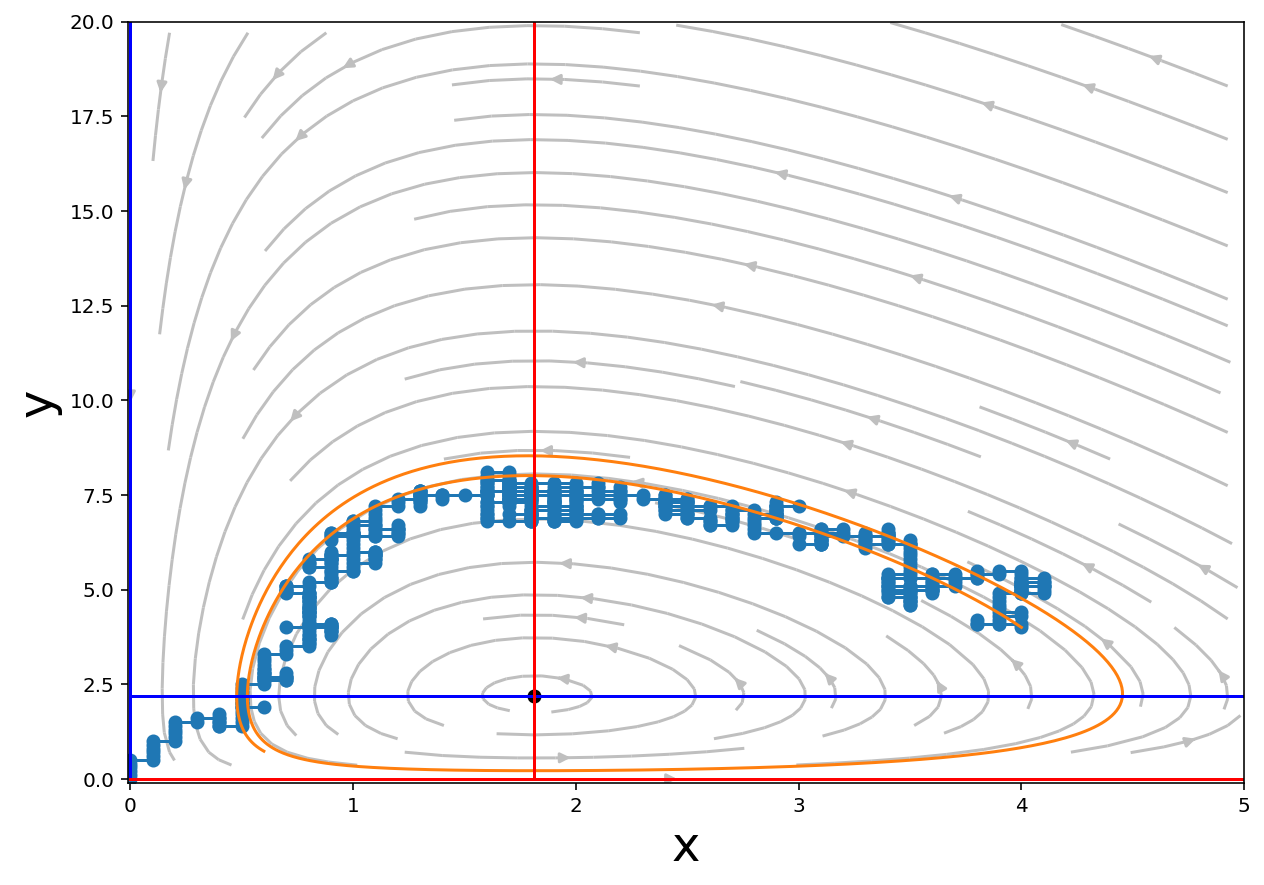

In [91]:
epsilon = 0.1
k1 = 1
k2 = 1
a = 2.1
b = 0.5
c = 1.6
d = 1.9


x0 = 4.
y0 = 4
n0 = int(x0/epsilon)
m0 = int(y0/epsilon)

figure(1, [10, 7])

###### Stochastic and ODE trajectories
T, N, M = stochastic_pp(epsilon)
Tode, Xode, Yode = pp_ode(a, b, c, d, x0, y0, 2*T[-1])

plot(epsilon*N, epsilon*M, '-o')
plot(Xode, Yode)

## Fixed point
xhat = (d + k2)/c
yhat = (a - k1)/b
plot(xhat, yhat, 'ok')

###### for vector field and phase plane
## x-nullcline
x = linspace(0, 20, 200)
y = (a - k1)/b*ones(200)
plot(0*x, x, 'b')
plot(x, y, 'b')
## y-nullcline
x = (d + k2)/c*ones(200)
y = linspace(0, 20, 200)
plot(y, 0*y, 'r')
plot(x, y, 'r')
## vector field
X, Y = meshgrid(linspace(0, 5, 50), linspace(0, 20, 50))
U = a*X - b*X*Y - k1*X
V = c*X*Y - d*Y - k2*Y
streamplot(X, Y, U, V, color='0.75')


xlim(-0.01, 5)
ylim(-0.1, 20)
xlabel('x', fontsize=24)
ylabel('y', fontsize=24);

In the following graph, we use a smaller value of $\epsilon$ and the stochastic solution appears to more closely match the ODE solution.

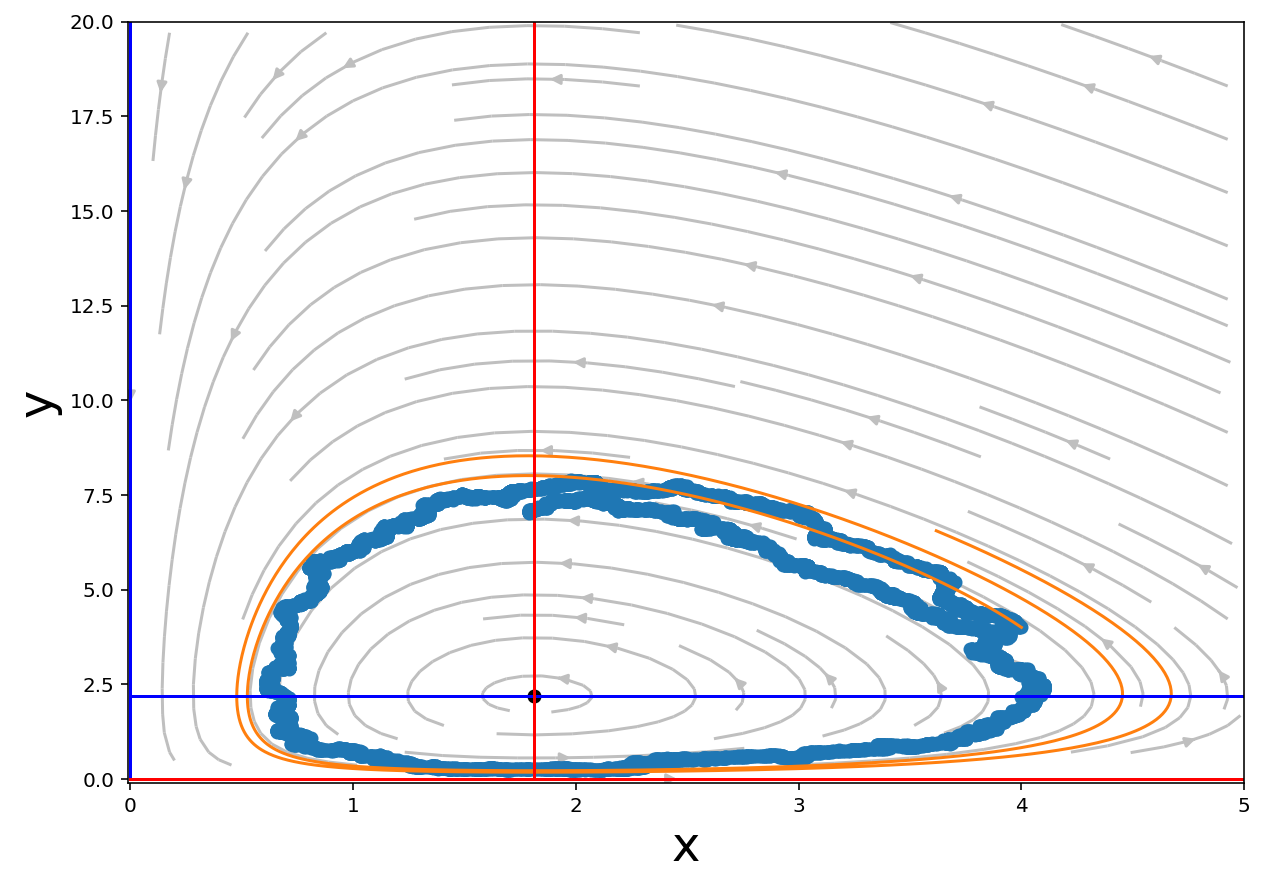

In [121]:
epsilon = 0.01
k1 = 1
k2 = 1
a = 2.1
b = 0.5
c = 1.6
d = 1.9


x0 = 4.
y0 = 4
n0 = int(x0/epsilon)
m0 = int(y0/epsilon)



figure(1, [10, 7])

###### Stochastic and ODE trajectories
T, N, M = stochastic_pp(epsilon)
Tode, Xode, Yode = pp_ode(a, b, c, d, x0, y0, 2*T[-1])

plot(epsilon*N, epsilon*M, '-o')
plot(Xode, Yode)

## Fixed point
xhat = (d + k2)/c
yhat = (a - k1)/b
plot(xhat, yhat, 'ok')

###### for vector field and phase plane
## x-nullcline
x = linspace(0, 20, 200)
y = (a - k1)/b*ones(200)
plot(0*x, x, 'b')
plot(x, y, 'b')
## y-nullcline
x = (d + k2)/c*ones(200)
y = linspace(0, 20, 200)
plot(y, 0*y, 'r')
plot(x, y, 'r')
## vector field
X, Y = meshgrid(linspace(0, 5, 50), linspace(0, 20, 50))
U = a*X - b*X*Y - k1*X
V = c*X*Y - d*Y - k2*Y
streamplot(X, Y, U, V, color='0.75')


xlim(-0.01, 5)
ylim(-0.1, 20)
xlabel('x', fontsize=24)
ylabel('y', fontsize=24);

Notice that the death rate (of the pesticide on the prey population) $k_1$ does not effect the x-component of the fixed point. If we increase $k_1$ with $k_2$ fixed, the fixed point shifts down, indicating that the average predator population will decrease. This should make extinction of the predator more likely than the prey.

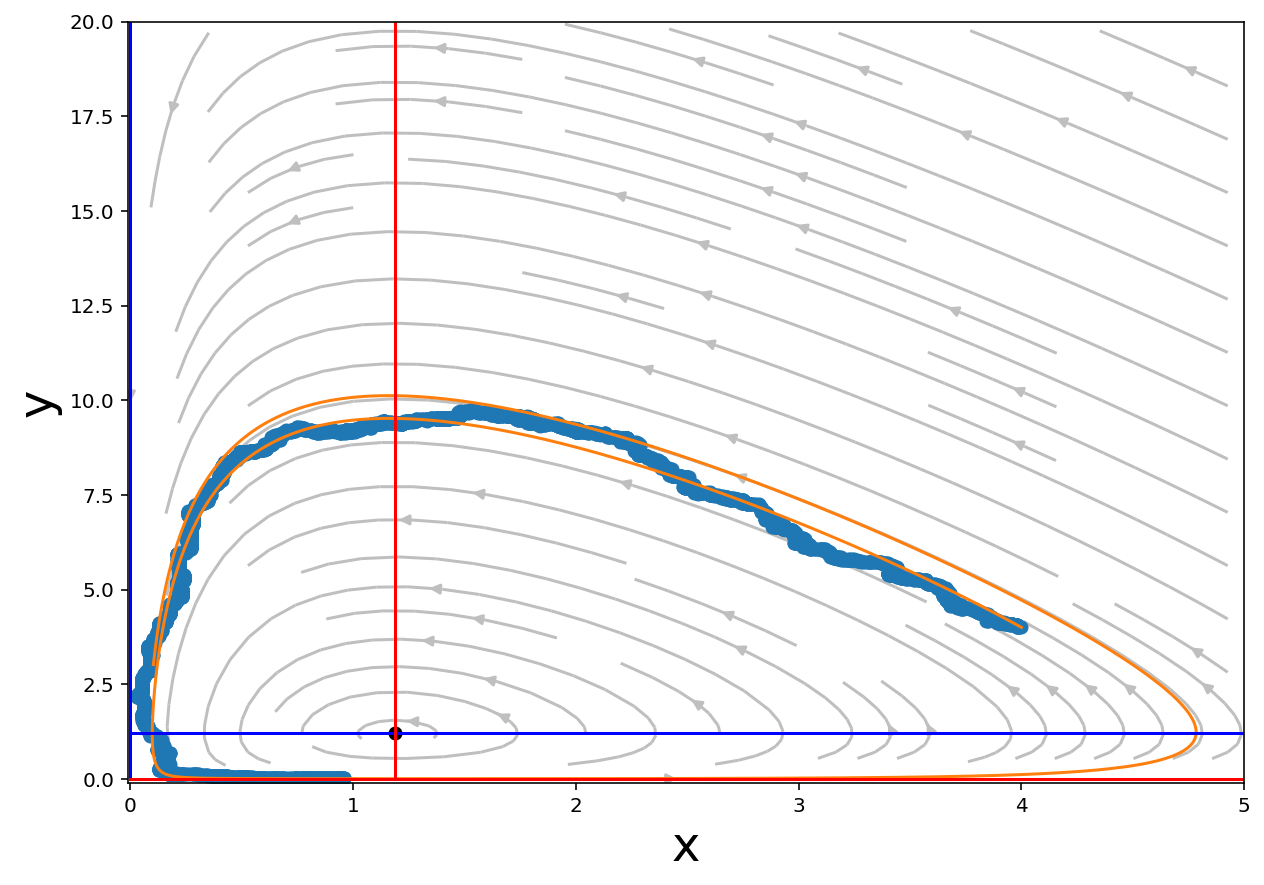

In [109]:
epsilon = 0.01
k1 = 1.5
k2 = 0
a = 2.1
b = 0.5
c = 1.6
d = 1.9


x0 = 4.
y0 = 4
n0 = int(x0/epsilon)
m0 = int(y0/epsilon)



figure(1, [10, 7])

###### Stochastic and ODE trajectories
T, N, M = stochastic_pp(epsilon)
Tode, Xode, Yode = pp_ode(a, b, c, d, x0, y0, 2*T[-1])

plot(epsilon*N, epsilon*M, '-o')
plot(Xode, Yode)

## Fixed point
xhat = (d + k2)/c
yhat = (a - k1)/b
plot(xhat, yhat, 'ok')

###### for vector field and phase plane
## x-nullcline
x = linspace(0, 20, 200)
y = (a - k1)/b*ones(200)
plot(0*x, x, 'b')
plot(x, y, 'b')
## y-nullcline
x = (d + k2)/c*ones(200)
y = linspace(0, 20, 200)
plot(y, 0*y, 'r')
plot(x, y, 'r')
## vector field
X, Y = meshgrid(linspace(0, 5, 50), linspace(0, 20, 50))
U = a*X - b*X*Y - k1*X
V = c*X*Y - d*Y - k2*Y
streamplot(X, Y, U, V, color='0.75')


xlim(-0.01, 5)
ylim(-0.1, 20)
xlabel('x', fontsize=24)
ylabel('y', fontsize=24);

If we increase $k_2$ with $k_1$ fixed, the fixed point shifts to the right, indicating that the average prey population will increase (fewer predators around increases the average prey population). This should make extinction of the predator more likely than the prey. 

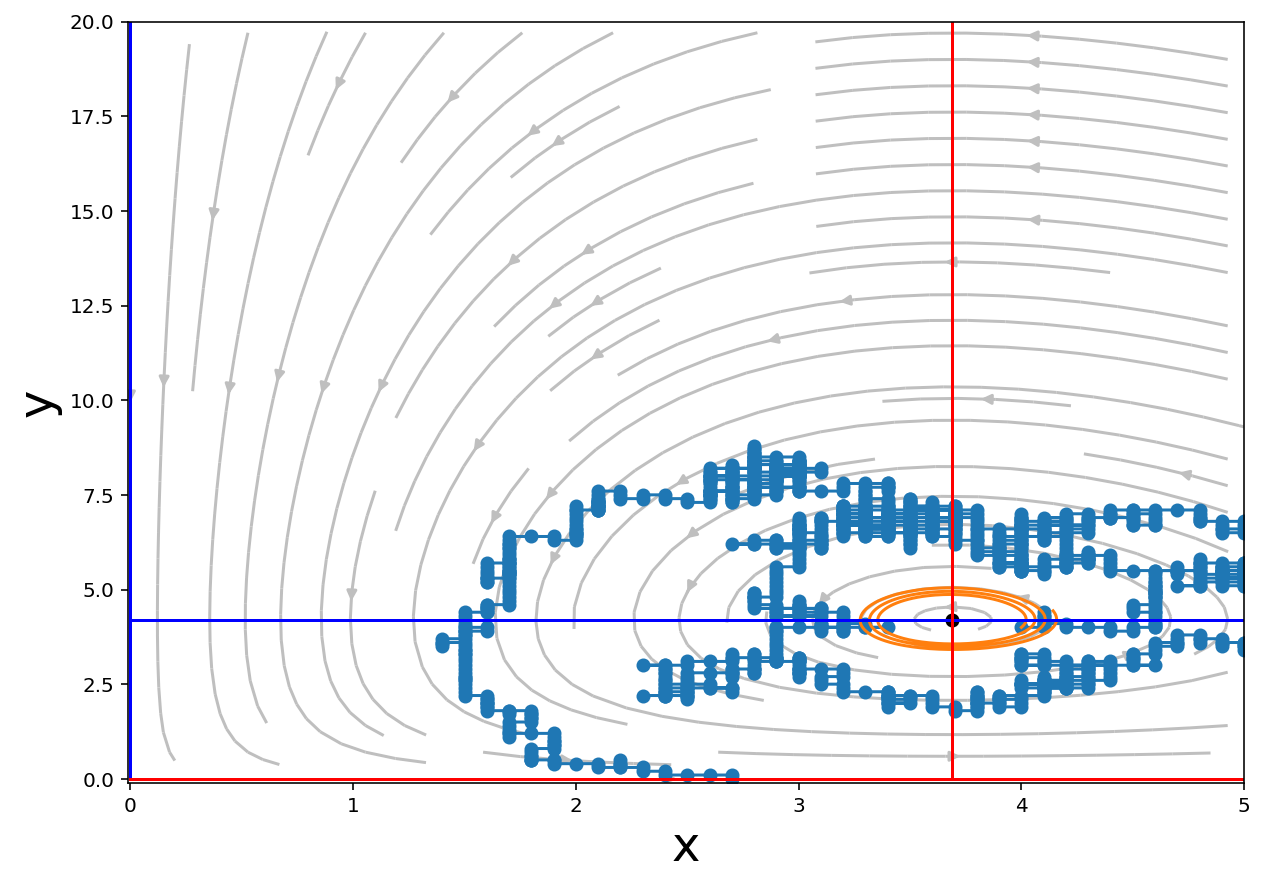

In [107]:
epsilon = 0.1
k1 = 0
k2 = 4
a = 2.1
b = 0.5
c = 1.6
d = 1.9


x0 = 4.
y0 = 4
n0 = int(x0/epsilon)
m0 = int(y0/epsilon)



figure(1, [10, 7])

###### Stochastic and ODE trajectories
T, N, M = stochastic_pp(epsilon)
Tode, Xode, Yode = pp_ode(a, b, c, d, x0, y0, 2*T[-1])

plot(epsilon*N, epsilon*M, '-o')
plot(Xode, Yode)

## Fixed point
xhat = (d + k2)/c
yhat = (a - k1)/b
plot(xhat, yhat, 'ok')

###### for vector field and phase plane
## x-nullcline
x = linspace(0, 20, 200)
y = (a - k1)/b*ones(200)
plot(0*x, x, 'b')
plot(x, y, 'b')
## y-nullcline
x = (d + k2)/c*ones(200)
y = linspace(0, 20, 200)
plot(y, 0*y, 'r')
plot(x, y, 'r')
## vector field
X, Y = meshgrid(linspace(0, 5, 50), linspace(0, 20, 50))
U = a*X - b*X*Y - k1*X
V = c*X*Y - d*Y - k2*Y
streamplot(X, Y, U, V, color='0.75')


xlim(-0.01, 5)
ylim(-0.1, 20)
xlabel('x', fontsize=24)
ylabel('y', fontsize=24);

# Q5

In [61]:
def BD_process(epsilon):
    N = zeros(Nsteps)
    N[0] = n0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        n = N[j-1]
        combined_rate = alpha/epsilon + n*r + n*d + b*n/(1 + epsilon**2*n**2)
        u = rand(1)
        tau = -log(u)/combined_rate
        T[j] = T[j-1] + tau # update time array with new time value
        ## now we make a random variable to decide if birth or death occurs
        probability_of_birth = (alpha/epsilon + n*r)/combined_rate
        probability_of_death = 1 - probability_of_birth
        u2 = rand(1)
        if u2 < probability_of_birth:
            N[j] = N[j-1] + 1 # a birth means N -> N+1
        else:
            N[j] = N[j-1] - 1
    return T, N
        
def ode(x0, Tmax): # change `Nsteps` to alter
    ### Euler's method parameters
    Delta_t = 0.1 # The size of the time step
    Nsteps = int(Tmax/Delta_t)
    x = zeros(Nsteps) # an array of zeros to store the solution in
    x[0] = x0 # store the initial condition
    def f_ode(x): # the ligistic growth RHS function
        return alpha - (d-r)*x - b*x/(1 + x**2)
    ####### The simulation loop #########
    for n in arange(1, Nsteps): # loop from n=1 up to n=Nsteps-1
        x[n] = x[n-1] + Delta_t*f_ode(x[n-1])
    t = Delta_t*arange(Nsteps)
    return t, x 


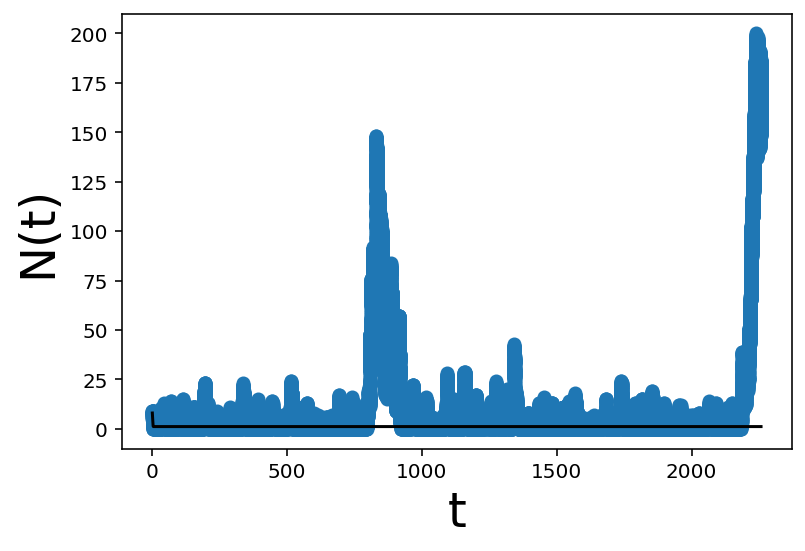

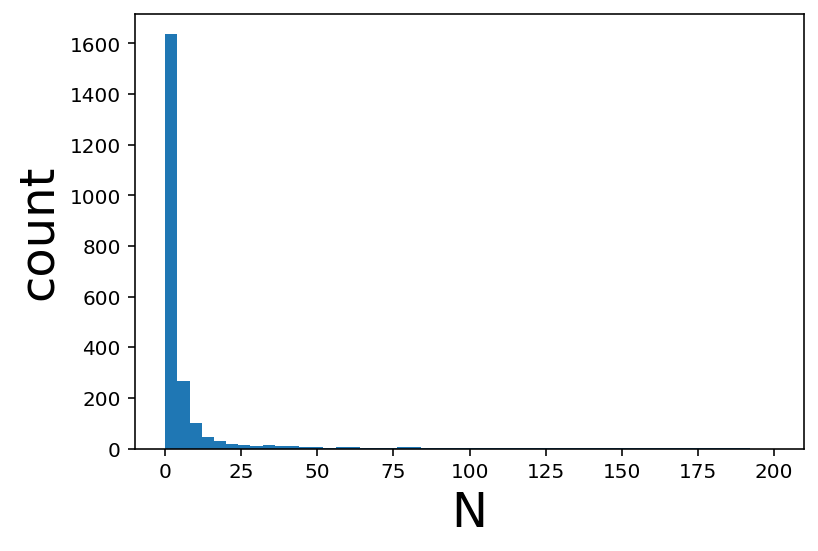

In [67]:
epsilon = 0.25 # TRY CHANGING THIS VALUE
alpha = 0.8
r = 1.
d = r + 0.03
b = 3.
# K = 1.
n0 = int(2/epsilon)
Nsteps = 50000

T, N = BD_process(epsilon)
Tode1, Xode1 = ode(2, T[-1])
######## plot the result
figure(1)
plot(T, N, '-o') # the option '-o' makes a line with 'o' symbols at the jump times
plot(Tode1, Xode1/epsilon, 'k')
xlabel('t', fontsize=24)
ylabel('N(t)', fontsize=24);

figure(2)
hist(N[1:], bins=50, weights=diff(T));
xlabel('N', fontsize=24)
ylabel('count', fontsize=24);

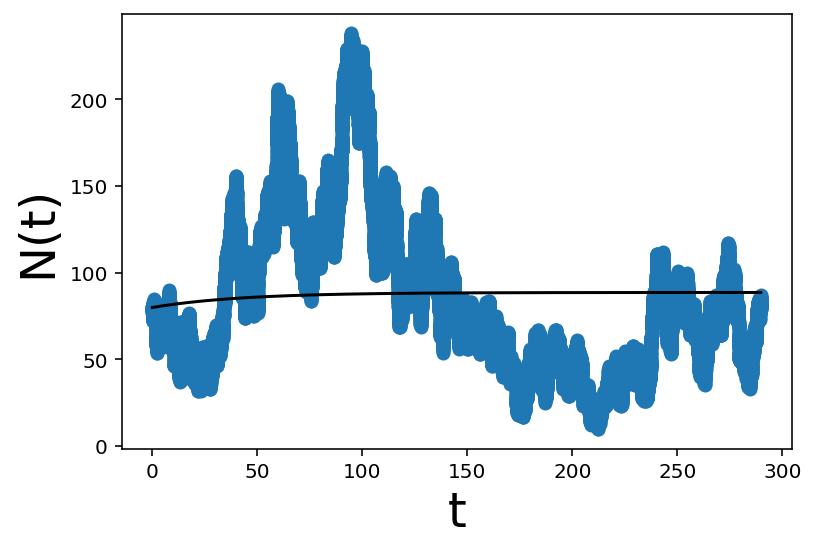

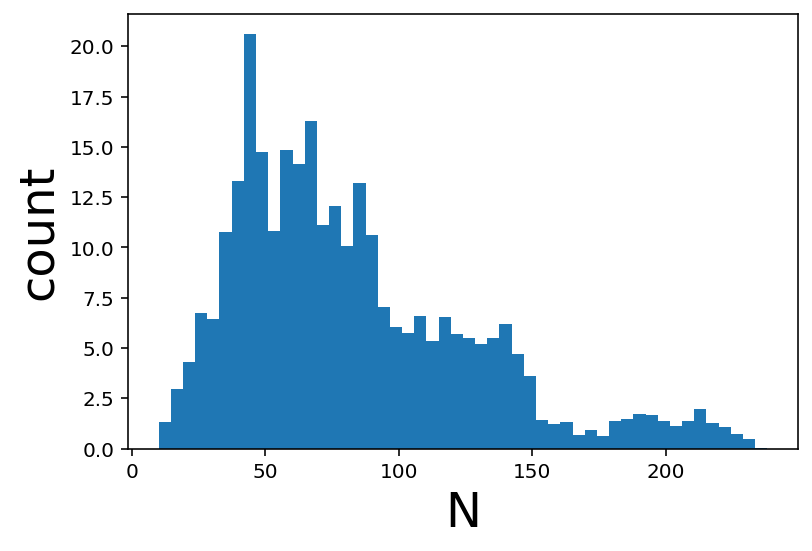

In [68]:
epsilon = 0.25 # TRY CHANGING THIS VALUE
alpha = 0.8
r = 1.
d = r + 0.03
b = 3.
# K = 1.
n0 = int(20/epsilon)
Nsteps = 50000

T, N = BD_process(epsilon)
Tode2, Xode2 = ode(20, T[-1])
######## plot the result
figure(1)
plot(T, N, '-o') # the option '-o' makes a line with 'o' symbols at the jump times
plot(Tode2, Xode2/epsilon, 'k')
xlabel('t', fontsize=24)
ylabel('N(t)', fontsize=24);

figure(2)
hist(N[1:], bins=50, weights=diff(T));
xlabel('N', fontsize=24)
ylabel('count', fontsize=24);

Each initial condition causes the ODE solution to converge to a different stable fixed point. The stochastic process initially fluctuates around the fixed point that the ODE solution converges to. Then the stochastic process switches back and forth between the two stable fixed points. The ODE solution does not do this. If we use a small number of time steps, the histograms should be concentrated around the fixed point converged to by the ODE solution with the same initial condition. The histogram should eventually (as Nsteps -> infinity) look similar for both initial conditions because the process explores the regions around both fixed points.